In [53]:
import pandas as pd

data = pd.read_csv("E:/招行数据比赛/data_two/评分数据集/评分数据集_tag.csv", usecols=[7])
# data = list(data)
# print(data)
data.duplicated()
# data1 = data.drop_duplicates()     #删除重复数据
# # print(data1)
# fw = open("E:/招行数据比赛/data_two/训练数据集/训练数据集/训练数据集_trd1.csv", "w")
# for line in data.values:
#     fw.write(str(line) + "\n")
# fw.close()
# print(data1)

0       False
1       False
2        True
3        True
4       False
5        True
6        True
7        True
8       False
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17      False
18       True
19      False
20       True
21       True
22       True
23      False
24       True
25      False
26       True
27       True
28       True
29       True
        ...  
5970     True
5971     True
5972     True
5973     True
5974     True
5975     True
5976     True
5977     True
5978     True
5979     True
5980     True
5981     True
5982     True
5983     True
5984     True
5985     True
5986     True
5987     True
5988     True
5989     True
5990     True
5991     True
5992     True
5993     True
5994     True
5995     True
5996     True
5997     True
5998     True
5999     True
Length: 6000, dtype: bool

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data_x = pd.read_csv("E:/招行数据比赛/data_two/训练数据集/训练数据集/训练数据集_tag.csv", usecols=[1])

# data_y = pd.read_csv("E:/招行数据比赛/data_two/评分数据集/评分数据集_tag.csv", usecols=[7])
# print(data_y)
# x = np.array(data_x)
# y = np.array(data_y)
# print(y)
# plt.plot(x, y)

# plt.show()y

#查看是否有缺失值
data = pd.read_csv("E:/招行数据比赛/data_two/训练数据集/训练数据集/训练数据集_onehot_tag.csv")

print(data.isnull().any())








id             False
flag           False
f_1            False
f_2            False
f_3            False
f_4            False
f_5            False
f_6            False
f_7            False
f_8            False
f_9            False
f_10           False
f_11           False
f_12           False
f_13           False
f_14           False
f_15           False
f_16           False
f_17           False
f_18           False
f_19           False
f_20           False
f_21           False
f_22           False
f_23           False
f_24           False
f_25           False
f_26           False
f_27           False
f_28           False
f_29           False
f_30           False
f_31           False
f_32           False
f_33           False
f_34           False
f_35           False
f_36           False
f_37           False
f_38           False
f_39           False
f_40           False
f_41           False
f_42           False
f_43           False
Unnamed: 45     True
dtype: bool


In [8]:
#这部分代码包括了LR、GBDT和GBDT与LR的模型融合部分
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from numpy import *

class Credit_risk_scorePreLR:
    def __init__(self):
        self.train_file = "E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_tag.csv"
        self.test_file = "E:/招行数据比赛/data_b/评分数据集b/b/评分数据集_tag_b.csv"
        self.train_data = self.load_train_data()
        self.test_data = self.load_test_data()
            
       # 空缺值以0值填充
    def isNone(self, value):
        if value == " " or value is None:
            return "0.0"
        else:
            return value
    
    def max_min(self, path, num):
        data = pd.read_csv(path, usecols=[num])
#         print(data)
        list_line = []
        for i in data.values:
#             if num == 7:
#                 print(i)
            if i == "\\N":
                list_line.append(int(0))
            elif i == " " or i is None:
                list_line.append(int(0))
            else:
#                 list_line.append(self.isNone(i))
                list_line.append(int(i))

        x_min = int(min(list_line))
        x_max = int(max(list_line))
#         a = int(sum(list_line))
#         print(a)
        a = 0
        for i in list_line:
            a += int(i)
        print(a)
        b = len(list_line)
        print(b)
        x_mean = int(a//b)
        return x_min, x_max, x_mean
        
    #处理训练集
    def load_train_data(self):
        data = pd.read_csv(self.train_file)

        labels = list(data.keys())
        # 构建labels 和对应的value映射
        fDict = dict()
        for f in labels:
            if f in ['gdr_cd','mrg_situ_cd']:
                fDict[f] = sorted(list(data.get(f).unique()))
        print(fDict)
        x_min1, x_max1, x_mean1 = self.max_min(self.train_file, 40)
        x_min2, x_max2, x_mean2 = self.max_min(self.train_file, 41)
        x_min3, x_max3, x_mean3 = self.max_min(self.train_file, 8)
        x_min4, x_max4, x_mean4 = self.max_min(self.train_file, 16)
        fw = open("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_onehot_tag.csv", "w")
        fw.write("id,")
        fw.write("flag,")
        for i in range(1,43): 
            fw.write('f_%s,' % i)
        fw.write("\n")
#         fw.write(",".join([str(f) for f in list_rel]) + "\n")
#         print(data.values)
        for line in data.values:
            list_line = list(line)
            list_res = list()
#             print(list_line.__len__())
            for i in range(0, list_line.__len__()):
                if labels[i] not in [ 'atdd_type', 'deg_cd','ic_ind','edu_deg_cd','acdm_deg_cd','gdr_cd','mrg_situ_cd','cur_debit_min_opn_dt_cnt','cur_credit_min_opn_dt_cnt','job_year','frs_agn_dt_cnt']:
                    if list_line[i] == "\\N":
                        list_res.append(0)
                    else:
                        list_res.append(self.isNone(list_line[i]))
                elif labels[i] in ['cur_debit_min_opn_dt_cnt']:
#                     round(x,4)   #对x保留4位小数
                    list_res.append(round((int(list_line[i])-x_mean1) / (x_max1 - x_min1), 2))
#                     list_res.append((int(list_line[i])-x_mean) / (x_max - x_min))
                        
                elif labels[i] in ['cur_credit_min_opn_dt_cnt']:
#                     round(x,4)   #对x保留4位小数
                    list_res.append(round((int(list_line[i])-x_mean2) / (x_max2 - x_min2), 2))
#                     list_res.append((int(list_line[i])-x_mean) / (x_max - x_min))

                elif labels[i] in ['job_year']:
#                     round(x,4)   #对x保留4位小数
                    if list_line[i] == "\\N":
                        list_res.append(0)
                    else:
                        list_res.append(round((int(list_line[i])-x_mean3) / (x_max3 - x_min3), 2))
    
                elif labels[i] in ['frs_agn_dt_cnt']:
#                     round(x,4)   #对x保留4位小数
                    if list_line[i] == "\\N":
                        list_res.append(0)
                    else:
                        list_res.append(round((int(list_line[i])-x_mean4) / (x_max4 - x_min4), 2))
    
                elif labels[i] in ['gdr_cd','mrg_situ_cd']:
                    # 创建one hot数组，看该labei下对应多少个不同的值
#                     arr =  fDict[labels[i]].__len__()
                    arr = [0] * fDict[labels[i]].__len__()
                    # 值的下标
                    ind = fDict[labels[i]].index(list_line[i])
                    # 让对应位置为1，其余位置为0
                    arr[ind] = 1
                    for one in arr: 
                        list_res.append(self.isNone(one))
            fw.write(",".join([str(f) for f in list_res]) + "\n")    
        fw.close()
        return pd.read_csv("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_onehot_tag.csv")
    
    #处理测试集
    def load_test_data(self):
        data = pd.read_csv(self.test_file)
        labels = list(data.keys())
        # 构建labels 和对应的value映射
        fDict = dict()
        for f in labels:
            if f in ['gdr_cd','mrg_situ_cd']:
                fDict[f] = sorted(list(data.get(f).unique()))
        print(fDict)
        x_min1, x_max1, x_mean1 = self.max_min(self.test_file, 39)
        x_min2, x_max2, x_mean2 = self.max_min(self.test_file, 40)
        x_min3, x_max3, x_mean3 = self.max_min(self.test_file, 7)
        x_min4, x_max4, x_mean4 = self.max_min(self.test_file, 15)
        fw = open("E:/招行数据比赛/data_b/评分数据集b/b/评分数据集_onehot_tag_b.csv", "w")
        fw.write("id,")
        for i in range(1,43): 
            fw.write('f_%s,' % i)
        fw.write("\n")
#         fw.write(",".join([str(f) for f in list_rel]) + "\n")
#         print(data.values)
        for line in data.values:
            list_line = list(line)
            list_res = list()
#             print(list_line.__len__())
            for i in range(0, list_line.__len__()):
                if labels[i] not in [ 'atdd_type', 'deg_cd','ic_ind','edu_deg_cd','acdm_deg_cd','gdr_cd','mrg_situ_cd','cur_debit_min_opn_dt_cnt','cur_credit_min_opn_dt_cnt','job_year','frs_agn_dt_cnt']:
                    if list_line[i] == "\\N":
                        list_res.append(0)
                    else:
                        list_res.append(self.isNone(list_line[i]))
                        
                elif labels[i] in ['cur_debit_min_opn_dt_cnt']:
#                     round(x,4)   #对x保留4位小数
                    list_res.append(round((int(list_line[i])-x_mean1) / (x_max1 - x_min1), 2))
    
                elif labels[i] in ['cur_credit_min_opn_dt_cnt']:
#                     round(x,4)   #对x保留4位小数
                    list_res.append(round((int(list_line[i])-x_mean2) / (x_max2 - x_min2), 2))
#                     list_res.append((int(list_line[i])-x_mean) / (x_max - x_min))

                elif labels[i] in ['job_year']:
#                     round(x,4)   #对x保留4位小数
                    if list_line[i] == "\\N":
                        list_res.append(0)
                    else:
                        list_res.append(round((int(list_line[i])-x_mean3) / (x_max3 - x_min3), 2))
    
                elif labels[i] in ['frs_agn_dt_cnt']:
#                     round(x,4)   #对x保留4位小数
                    if list_line[i] == "\\N":
                        list_res.append(0)
                    else:
                        list_res.append(round((int(list_line[i])-x_mean4) / (x_max4 - x_min4), 2))
    
                elif labels[i] in ['gdr_cd','mrg_situ_cd']:
                    # 创建one hot数组，看该labei下对应多少个不同的值
#                     arr =  fDict[labels[i]].__len__()
                    arr = [0] * fDict[labels[i]].__len__()
                    # 值的下标
                    ind = fDict[labels[i]].index(list_line[i])
                    # 让对应位置为1，其余位置为0
                    arr[ind] = 1
                    for one in arr: 
                        list_res.append(self.isNone(one))
            fw.write(",".join([str(f) for f in list_res]) + "\n")    
        fw.close()
        return pd.read_csv("E:/招行数据比赛/data_b/评分数据集b/b/评分数据集_onehot_tag_b.csv")

        
    #模型训练
    def train_model(self):
#         print(self.train_data.isnull().any())
        print("Start Train Model...")
#         print(self.data.shape)
        label = "flag"
        ID = "id"
        x_columns = [x for x in self.train_data.columns if x not in [label, ID]]
        x_train = self.train_data[x_columns]
        y_train = self.train_data[label]
#         print(x_train)
#         x_train = float(x_train)
#         y_train = float(y_train)
        print(y_train.shape)
        #定义逻辑斯蒂回归模型
#         lr = LogisticRegression(penalty='l2', tol=1e-4, random_state = 400, fit_intercept = True)
#         lr.fit(x_train, y_train)
#         return lr
        #定义GBDT模型
#         gbdt = GradientBoostingClassifier(learning_rate=0.01, n_estimators=200, max_depth=6)
#         gbdt.fit(x_train, y_train)
        
        #gbdt_lr模型融合
        # 创建gbdt模型 并训练
        gbdt = GradientBoostingClassifier()
        gbdt.fit(x_train, y_train)
        # 模型融合
        gbdt_lr = LogisticRegression()
        enc = OneHotEncoder()
        print(gbdt.apply(x_train).shape)
        print(gbdt.apply(x_train).reshape(-1,100).shape)

        # 100为n_estimators，迭代次数
        enc.fit(gbdt.apply(x_train).reshape(-1,100))
        gbdt_lr.fit(enc.transform(gbdt.apply(x_train).reshape(-1,100)),y_train)

        return enc, gbdt, gbdt_lr


    #模型评估
#     def evaluate(self, lr, type):
#     def evaluate(self, gbdt):
    def evaluate(self,enc,gbdt,gbdt_lr):
        ID = "id"
        x_columns = [x for x in self.test_data.columns if x not in [ID]]
        x_test = self.test_data[x_columns]
#         y_test = self.test_train[label]
#         print(x_test)
        #LR模型处理
#         if type == 1:
#             y_pred = lr.predict(x_test)
#             new_y_pred = y_pred
#         if type == 2:
#             y_pred = lr.predict_proba(x_test)
#         print(y_pred)

        #GBDT模型
#         y_pred = gbdt.predict_proba(x_test)
        
        #GBDT+LR模型融合
        y_pred = gbdt_lr.predict_proba(enc.transform(gbdt.apply(x_test).reshape(-1,100)))

        f1 = open("E:/招行数据比赛/data_b/评分数据集b/b/提交结果.txt","w")
        for i in y_pred:
            f1.writelines(str(i[1])+'\n')
#         for i in y_pred:
#             new_y_pred = list()
#             new_y_pred.append(i[1])
#             print(new_y_pred)
#             f1.writelines(str(new_y_pred)+"\n")
#             f1.writelines(new_y_pred+"\n")
#             f1.writelines("\n".join(str(new_y_pred)))
        f1.close()
        
if __name__ == '__main__':
    pred = Credit_risk_scorePreLR()
#     pred.max_min(40)
#     pred.load_train_data()
#     pred.load_test_data()
    #逻辑斯蒂回归模型
#     lr = pred.train_model()
#     pred.evaluate(lr, 2)#type = 1: 表示输出0、1  type = 2 :表示输出概率
    #GBDT模型
#     gbdt = pred.train_model()
#     pred.evaluate(gbdt)
    #GBDT_LR
    enc, gbdt, gbdt_lr = pred.train_model()
    pred.evaluate(enc, gbdt,gbdt_lr)

    

{'gdr_cd': ['F', 'M', '\\N'], 'mrg_situ_cd': ['A', 'B', 'O', 'Z', '\\N', '~']}


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


48761178
39923
51637658
39923
110915
39923
6919182
39923
{'gdr_cd': ['F', 'M', '\\N'], 'mrg_situ_cd': ['A', 'B', 'O', 'Z', '\\N', '~']}
4855782
4000
5133562
4000
11373
4000
683888
4000
Start Train Model...
(39923,)


ValueError: feature_names mismatch: ['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'Unnamed: 44'] ['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'Unnamed: 43']
expected Unnamed: 44 in input data
training data did not have the following fields: Unnamed: 43

In [5]:
#合并文件
import pandas as pd

data = pd.read_csv("E:/招行数据比赛/data_b/评分数据集b/b/评分数据集_onehot_tag_b.csv", usecols=[0])

fw = open("E:/招行数据比赛/data_b/评分数据集b/b/name.txt","w")
for i in data.values:
    list_line = []
    fw.writelines(str(i[0])+'\n')
fw.close()

f1 = open("E:/招行数据比赛/data_b/评分数据集b/b/name.txt","r")
f2 = open("E:/招行数据比赛/data_b/评分数据集b/b/提交结果.txt","r")
list1 = []
list2 = []
file_list1 = f1.readlines()
file_list2 = f2.readlines()
list1 = list(file_list1)
list2 = list(file_list2)
# print(list1)
# print(len(file_list1))
f3 = open("E:/招行数据比赛/data_b/评分数据集b/b/answer.txt","w")
list_res = []
for i in range(len(file_list1)):
    list1[i] = list1[i].strip('\n')
    f3.write(" ".join([list1[i],list2[i]]))
f3.close()
f2.close()
f1.close()



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_onehot_tag.csv")
# data = pd.read_csv("E:/招行数据比赛/data_b/评分数据集b/b/评分数据集_tag_b.csv")

# data.info()
data.describe()
# fig = plt.figure()
# fig.set(alpha=0.2)

# plt.subplot2grid((1,1),(0,0))
# data.flag.value_counts().plot(kind='bar')

,flag,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43
count,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,...,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.00000,39923.000000,39923.000000
mean,0.224257,0.405080,0.576485,0.018435,34.325727,0.478897,0.465847,0.025925,0.004684,0.018435,...,0.778348,15.194449,0.716229,2.490544,3.690179,1.109110,1.440924,-0.00059,0.000268,8.700999
std,0.417097,0.490914,0.494122,0.134522,8.541069,0.499561,0.498838,0.158913,0.068280,0.134522,...,21.727054,7.317585,0.450833,1.735714,2.124529,2.521372,1.497116,0.16867,0.208636,7.894769
min,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-0.13000,-0.210000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,10.000000,0.000000,1.000000,2.000000,0.000000,1.000000,-0.13000,-0.150000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,1.000000,3.000000,3.000000,1.000000,1.000000,-0.08000,-0.070000,10.000000
75%,0.000000,1.000000,1.000000,0.000000,39.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,1.000000,4.000000,5.000000,1.000000,2.000000,0.07000,0.080000,10.000000
max,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1623.000000,70.000000,1.000000,5.000000,8.000000,178.000000,173.000000,0.87000,0.790000,80.000000


In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from numpy import *

class Credit_risk_scorePreLR:
    def __init__(self):
        self.train_data = self.load_train_data()
        self.test_data = self.load_test_data()
    
    def load_train_data(self):
        data = pd.read_csv("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_onehot_tag.csv")
        return data
        
    def load_test_data(self):
        data = pd.read_csv("E:/招行数据比赛/data_b/评分数据集b/b/评分数据集_onehot_tag_b.csv")
        return data
        
        #模型训练
    def train_model(self):
#         print(self.train_data.isnull().any())
        print("Start Train Model...")
#         print(self.data.shape)
        label = "flag"
        ID = "id"
        x_columns = [x for x in self.train_data.columns if x not in [label, ID]]
        x_train = self.train_data[x_columns]
        y_train = self.train_data[label]


#         xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=550, max_depth=4, min_child_weight=5, seed=0,
#                              subsample=0.7, colsample_bytree=0.7, gamma=0.1, reg_alpha=1, reg_lambda=1)
        xgb_model = xgb.XGBRegressor(learning_rate=0.1, n_estimators=550, max_depth=4, min_child_weight=5, seed=0,
                             subsample=0.7, colsample_bytree=0.7, gamma=0.1, reg_alpha=1, reg_lambda=1)
        xgb_model.fit(x_train, y_train)
        
#         train_sizes,train_score,test_score = learning_curve(xgb_model,x_train,y_train,train_sizes=np.linspace(0.1, 1.0, 5),cv=10,scoring='accuracy')  
#         train_error = np.mean(train_score,axis=1)
#         test_error = np.mean(test_score,axis=1)
#         plt.plot(train_sizes,train_error,'o-',color = 'r',label = 'training')
#         plt.plot(train_sizes,test_error,'o-',color = 'g',label = 'testing')
#         plt.legend(loc='best')
#         plt.xlabel('traing examples')
#         plt.ylabel('error')
#         plt.show()
        
        return xgb_model


    #模型评估

    def evaluate(self, xgb_model):
        ID = "id"
        x_columns = [x for x in self.test_data.columns if x not in [ID]]
        x_test = self.test_data[x_columns]

        #xgb模型
#         y_pred = xgb_model.predict_proba(x_test)
        y_pred = xgb_model.predict(x_test)
        print(y_pred)

        f1 = open("E:/招行数据比赛/data_b/评分数据集b/b/提交结果.txt","w")
        for i in y_pred:
#             f1.writelines(str(i[1])+'\n')
            f1.writelines(str(i)+'\n')

        f1.close()
        
if __name__ == '__main__':
    pred = Credit_risk_scorePreLR()
    #xgb模型
    xgb_model = pred.train_model()
    pred.evaluate(xgb_model)
    

Start Train Model...
[0.22349143 0.13820413 0.22571626 ... 0.08574933 0.15736598 0.20627707]


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


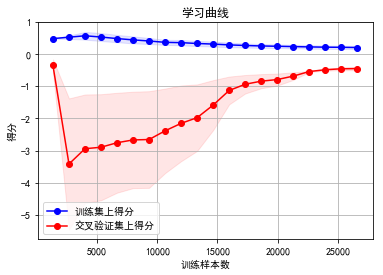

(-0.12712614316024606, 0.7596989056460832)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

train_data = pd.read_csv("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_onehot_tag.csv")
label = "flag"
ID = "id"
x_columns = [x for x in train_data.columns if x not in [label, ID]]
x = train_data[x_columns]
y = train_data[label]

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(xgb_model, u"学习曲线", x, y)

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
# from sklearn import model_selection

train_data = pd.read_csv("E:/招行数据比赛/data_b/训练数据集/训练数据集/训练数据集_onehot_tag.csv")
label = "flag"
ID = "id"
x_columns = [x for x in train_data.columns if x not in [label, ID]]
x = train_data[x_columns]
y = train_data[label]

# 简单看看打分情况
clf = LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
# all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

# X = all_data.values[:,1:]
# y = all_data.values[:,0]
print(cross_validate(clf, x, y, cv=5))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'fit_time': array([12.88501596, 16.67722011, 19.91872597, 13.09966087, 21.57055807]), 'score_time': array([0.01002955, 0.00804353, 0.00952029, 0.0128901 , 0.00966525]), 'test_score': array([0.74852849, 0.7773325 , 0.77683156, 0.77392285, 0.77342184]), 'train_score': array([0.78235957, 0.77619137, 0.77594089, 0.77579135, 0.77710636])}
